In [1]:
#I want to put this in the get get_author_by_email script later

import openreview
import pandas as pd
import datetime as date
import tqdm
import json
from email2country import email2country,email2institution_country
import matplotlib.pyplot as plt
import ast
client = openreview.Client(baseurl='https://api.openreview.net')

In [2]:
df_author_info = pd.read_csv('./data/authors/df_author_profiles.csv')

try:
    df_author_info = df_author_info.drop(columns=['Unnamed: 0'])
except:
    pass
df_author_info.history[300]

"[{'position': 'Researcher', 'start': 2021, 'end': None, 'institution': {'domain': 'microsoft.com', 'name': 'Microsoft'}}, {'position': 'PhD student', 'start': 2015, 'end': 2021, 'institution': {'name': 'Johns Hopkins University', 'domain': 'jhu.edu'}}, {'position': 'Undergrad student', 'start': 2011, 'end': 2015, 'institution': {'name': 'University of California Berkeley', 'domain': 'berkeley.edu'}}]"

In [3]:
#this is gathering all the emails
update = 0
institution_dic ={}

if update ==1:
    for domain in tqdm.tqdm(list(set(df_author_info['email'].apply(lambda x: x.split('@')[1]).tolist()))):
        if domain in institution_dic.keys():
            pass
        else:
            try:
                institution_dic[domain] = client.get_institution(domain)
            except:
                institution_dic[domain] = {'country':domain,'institution':domain}
                
    with open('./data/authors/institution_dic.json', 'w') as fp:
        json.dump(institution_dic, fp)
else:
    institution_dic = json.load(open('./data/authors/institution_dic.json'))

institution_dic

{'iwr.uni-heidelberg.de': {'parent': 'uni-heidelberg.de',
  'shortname': '',
  'fullname': 'Heidelberg University',
  'id': 'iwr.uni-heidelberg.de'},
 'cs.uni.wroc.pl': {'country': 'cs.uni.wroc.pl',
  'institution': 'cs.uni.wroc.pl'},
 'sam.math.ethz.ch': {'country': 'sam.math.ethz.ch',
  'institution': 'sam.math.ethz.ch'},
 'ustc.edu.cn': {'parent': '',
  'shortname': '',
  'fullname': 'University of Science and Technology of China',
  'id': 'ustc.edu.cn',
  'country': 'China',
  'alphaTwoCode': 'CN',
  'webPages': ['http://www.ustc.edu.cn/']},
 'post.pl': {'country': 'post.pl', 'institution': 'post.pl'},
 'huan-zhang.com': {'country': 'huan-zhang.com',
  'institution': 'huan-zhang.com'},
 'thalesgroup.com': {'country': 'thalesgroup.com',
  'institution': 'thalesgroup.com'},
 'ncat.edu': {'parent': '',
  'shortname': '',
  'fullname': 'North Carolina A&T State University',
  'id': 'ncat.edu',
  'country': 'United States',
  'alphaTwoCode': 'US',
  'webPages': ['http://www.ncat.edu/']}

In [4]:
institution_dic['ohio.edu']['country']


'United States'

In [5]:
#wrapper_get_institution('Naveen.Ramakrishnan@us.bosch.com')

def get_institution_info(row):
    text = row['email']
    domain = text.split('@')[1]
    try:
        output = institution_dic[domain]
        return output['country'],output['fullname']
    except:
        try:
            message = None#'institution_dic error'
            country = email2institution_country(domain,enable_warning=False)
            return country,domain
        except:
            message = None #'email2institution_country error'
            return message,domain

def get_history(row):
    #errored still
    str_2017_position =''
    str_2018_position =''
    str_2019_position =''
    row = row['history']
    try:
        if type(row)==str:
            row = ast.literal_eval(row)

        for dict_history in row:
            #ICLR 2017 submission deadline 11/4/2016
            #ICLR 2018 submission deadline 10/27/2017
            #ICLR 2019 submission deadline 9/27/2018

            start = pd.to_datetime(dict_history['start'],format='%Y')
            if dict_history['end'] is None:
                end = pd.Timestamp.now()
            else:
                end = pd.to_datetime(dict_history['end'],format='%Y')


            if start < pd.to_datetime('11/4/2016') <= end:
                str_2017_position = dict_history['position']

            if start < pd.to_datetime('10/27/2017') <= end:
                str_2018_position = dict_history['position']

            if start < pd.to_datetime('9/27/2018') <= end:
                str_2019_position = dict_history['position']            

        return str_2017_position, str_2018_position, str_2019_position
    except:
        return None,None,None


In [6]:
ast.literal_eval(df_author_info.history[7])

[]

In [7]:
#get the institutional location through automatic tool
tqdm.tqdm.pandas()
update = 1
if update == 1:
    df_author_info[['location','institution']]=df_author_info.progress_apply(lambda x: get_institution_info(x),axis=1,result_type = 'expand')
    df_author_info.to_csv('./data/authors/df_author_profiles.csv',index=False)
else:
    pass


100%|███████████████████████████████████████| 8106/8106 [03:19<00:00, 40.65it/s]


In [8]:
tqdm.tqdm.pandas()
update = 1
if update == 1:
    df_author_info[['2017_position','2018_position','2019_position']]=df_author_info.progress_apply(lambda x: get_history(x),axis=1,result_type = 'expand')
    df_author_info.to_csv('./data/authors/df_author_profiles.csv',index=False)
else:
    pass


100%|█████████████████████████████████████| 8106/8106 [00:06<00:00, 1244.97it/s]


In [10]:
df_author_info[['2017_position','2018_position','2019_position']]

,2017_position,2018_position,2019_position
0,None,None,None
1,,,
2,None,None,None
3,None,None,None
4,None,None,None
...,...,...,...
8101,None,None,None
8102,None,None,None
8103,PhD student,PhD student,PhD student
8104,Associate Professor,Associate Professor,Associate Professor


<AxesSubplot:>

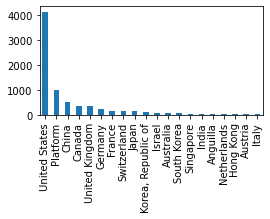

In [23]:
df_author_info['location'].value_counts().nlargest(20).plot(kind='bar',figsize = (4,2))


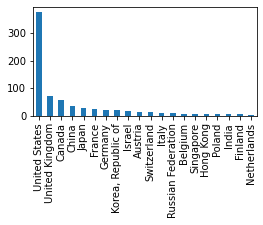

In [12]:
df_author_loaction_2017 = df_author_info.query("year==2017")
df_author_loaction_2018 = df_author_info.query("year==2018")
df_author_loaction_2019 = df_author_info.query("year==2019")


x1 = df_author_loaction_2017['location'].value_counts().nlargest(20).plot(kind='bar',figsize = (4,2))

<AxesSubplot:>

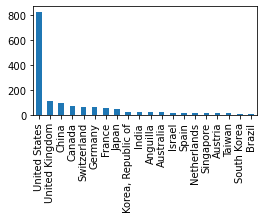

In [13]:
df_author_loaction_2018['location'].value_counts().nlargest(20).plot(kind='bar',figsize = (4,2))

<AxesSubplot:>

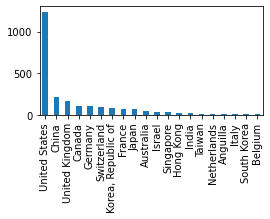

In [21]:
df_author_loaction_2019['location'].value_counts().nlargest(20).plot(kind='bar',figsize = (4,2))


<AxesSubplot:>

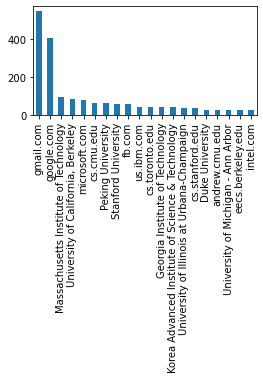

In [25]:
df_author_loaction_2019['institution'].value_counts().nlargest(20).plot(kind='bar',figsize = (4,2))

In [22]:
df_author_info.groupby('institution')['institution'].count().nlargest(50)




institution
gmail.com                                           966
google.com                                          810
microsoft.com                                       182
University of California, Berkeley                  161
Massachusetts Institute of Technology               158
cs.cmu.edu                                          136
fb.com                                              126
Stanford University                                 122
us.ibm.com                                           96
Peking University                                    91
cs.stanford.edu                                      80
University of Michigan - Ann Arbor                   75
cs.toronto.edu                                       74
University of Illinois at Urbana-Champaign           70
Georgia Institute of Technology                      69
intel.com                                            60
Korea Advanced Institute of Science & Technology     57
University of Southern California   

In [20]:
df_author_info.groupby(['location']).institution.count()

location
Anguilla                            42
Australia                           75
Austria                             38
Belgium                             20
Brazil                              25
British Indian Ocean Territory      13
Canada                             377
Chile                                2
China                              511
Cocos (Keeling) Islands              4
Colombia                             2
Croatia                              4
Cyprus                               2
Czechia                              7
Denmark                             11
Egypt                                3
European Union                       5
Finland                             10
France                             174
Germany                            241
Greece                               5
Hong Kong                           41
India                               54
Iran                                 3
Ireland                              3
Israel          

In [18]:
df_missing_locations_by_domiain = pd.read_csv('./data/authors/email_location_missing.csv')

dict_missing_email_location = {}
for index, row in df_missing_locations_by_domiain.iterrows():
    dict_missing_email_location[row[0]] = row[1]

In [19]:
def get_missing_location(row):
    try:
        location = dict_missing_email_location[row['institution']]
    except:
        location = row['location']
    return location

df_author_info['location'] = df_author_info.apply(lambda x: get_missing_location(x), axis = 1)

In [24]:
df_author_info.to_csv('./data/authors/df_author_profiles.csv',index=False)